In [1]:
from kmeans import *
from voltage import *
import os

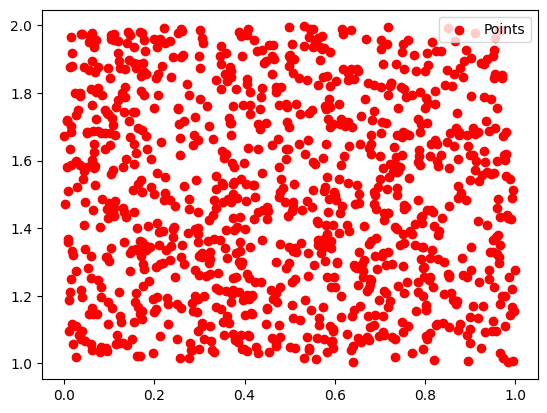

In [2]:
data = Data("square_fill.json", stream=False)
data.plot()

In [3]:
k = 100

partitions = Partitions(data)
partitions.k_means(k, seed=time.time())

In [4]:
most_central_index = 0

for index in range(len(partitions.centers)):
    if distance(partitions.centers[index], [0.5, 1.5]) < distance(partitions.centers[most_central_index], [0.5, 1.5]):
        most_central_index = index

# print(partitions.centers[most_central_index])

C:\Users\avigh\AppData\Local\Temp\ipykernel_19828\1126726528.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


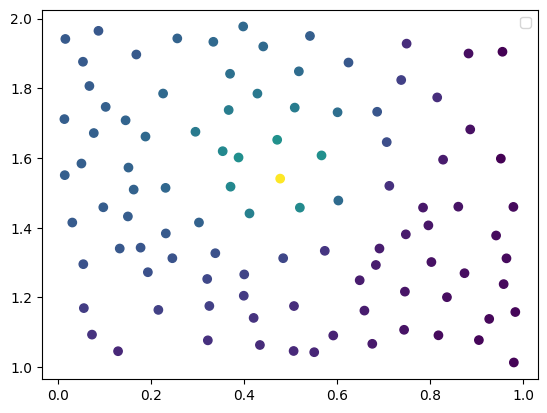

In [8]:
landmarks = [Landmark(most_central_index, 1)]
# c = bestCFinder(gaussiankernel, landmarks, partitions)

landmarkSolver = Solver(partitions.centers)
landmarkSolver.setPartitionWeights(kernel=gaussiankernel, c=0.1, partition=partitions)
landmarkSolver.addUniversalGround(p_g=0.0001)
landmarkSolver.addLandmarks(landmarks)
landmarkVoltages = landmarkSolver.compute_voltages()

dim = len(landmarkSolver.data[0])

fig = plt.figure()

ax = fig.add_subplot(111)
ax.legend()

(x_coords, y_coords, z_coords) = pointFormatting(landmarkSolver.data)

if (dim == 1):
    ax.scatter(x_coords, c=landmarkSolver.voltages, cmap='viridis', marker='o')
if (dim == 2):
    ax.scatter(x_coords, y_coords, c=landmarkSolver.voltages, cmap='viridis', marker='o')

plt.show()

In [12]:
voltages = [0 for i in range(len(data))]

for index in range(k):
    closestIndicies = partitions.getClosestPoints(index)
    closeLandmarksIndicies = []

    for pair in partitions.voronoi.ridge_points:
        if pair[0] == index:
            closeLandmarksIndicies.append(pair[1])
        if pair[1] == index:
            closeLandmarksIndicies.append(pair[0])

    closeLandmarks = []
    for cli in closeLandmarksIndicies:
        closeLandmarks.append(Landmark(cli, landmarkVoltages[cli]))

    localSolver = Solver(data.getSubSet(closestIndicies))
    localSolver.setWeights(kernel=gaussiankernel, c=c)
    localSolver.addLandmarks(closeLandmarks)
    localVoltages = localSolver.compute_voltages()

    for i, v in zip(closestIndicies, localVoltages):
        voltages[i] = v

AttributeError: 'Partitions' object has no attribute 'voronoi'

C:\Users\avigh\Documents\python\VoltageDimentionalReduction\voltage.py:129: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


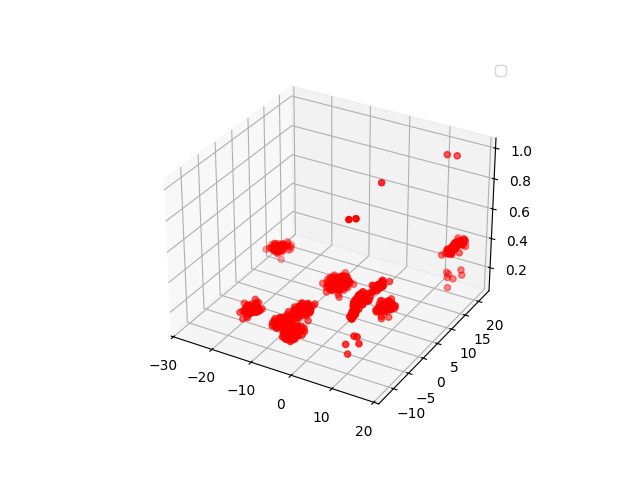

<Axes3D: >

In [7]:
temp = Solver(data)
temp.voltages = voltages
%matplotlib widget
temp.plot()